<a href="https://colab.research.google.com/github/samuel-guedes/data_science/blob/master/An%C3%A1lise_de_ENEM_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de ENEM 2019**

Análise realizada durante a Imersão Dados realizado pela **ALURA**  (www.alura.com.br) com os instrutores Thiago Santos, Thainá Mariani, Guilherme Silveira e Maria Gabriela.
<br><br>
Para as aulas foi disponibilizado uma amostra dos dados disponíveis em http://download.inep.gov.br/microdados/microdados_enem_2019.zip. Como a base é consideravelmente grande (3GB / mais de 5 milhões de linhas), criei uma nova amostra com 10% da base total para seguir com os Desafios porpostos durante a Imersão de Dados
<br><br>



### **Base de Dados Completa**
 
 <p align=center><img src= "https://bit.ly/3dW7Q9n" width= "50%"></p>
 <br><br>

 ### **Comparação entre Base e Amostra**
 Comparando as duas base de dados vemos que não há diferença entre a População e Amostra, como podemos observar utilzando Boxplot e Describe.

 <br>
 <p align=center><img src= "https://bit.ly/3mn8PT7" width= "40%">
                <img src= "https://bit.ly/3dSUQl2" width= "60%"></p>
 <br><br>






 


## ***Análise Exploratória***


In [59]:
#Importando bibliotecas necessárias

import pandas as pd
import matplotlib.pyplot as plt

In [15]:
#Importação da base de dados (Amostras)

base = pd.read_csv('sample.csv')

RangeIndex(start=0, stop=509527, step=1)


In [32]:
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
print(base[provas].info(),'\n')
print('Contagem de NaN:','\n',base[provas].isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509527 entries, 0 to 509526
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   NU_NOTA_CN       371161 non-null  float64
 1   NU_NOTA_CH       392388 non-null  float64
 2   NU_NOTA_MT       371161 non-null  float64
 3   NU_NOTA_LC       392388 non-null  float64
 4   NU_NOTA_REDACAO  392388 non-null  float64
dtypes: float64(5)
memory usage: 19.4 MB
None 

Contagem de NaN: 
 NU_NOTA_CN         138366
NU_NOTA_CH         117139
NU_NOTA_MT         138366
NU_NOTA_LC         117139
NU_NOTA_REDACAO    117139
dtype: int64


In [35]:
base[provas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,371161.000000,392388.000000,371161.000000,392388.000000,392388.000000
mean,477.824754,507.339139,523.060688,520.544071,571.484959
std,76.086690,82.313167,109.114327,64.027509,188.968509
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,417.700000,448.100000,434.900000,483.400000,480.000000
50%,470.300000,510.600000,501.000000,526.200000,580.000000
75%,533.100000,566.600000,597.600000,565.300000,680.000000
max,853.500000,812.800000,985.500000,801.700000,1000.000000


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(0.0, 1000.0)

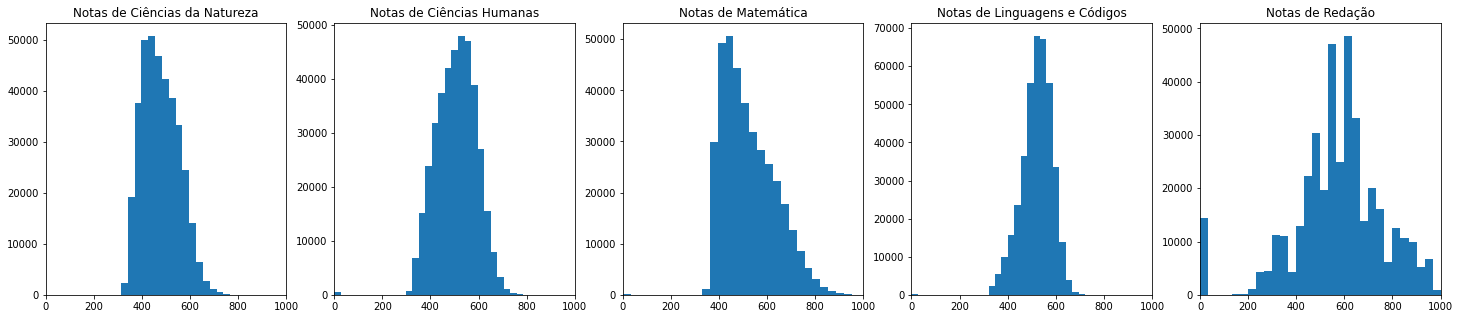

In [58]:
#Análise de Distribuição das Notas

fig, axes = plt.subplots(1,5, figsize=(25,5))

axes[0].hist(base['NU_NOTA_CN'], bins = 30)
axes[0].set_title("Notas de Ciências da Natureza")
axes[0].set_xlim((0, 1000))

axes[1].hist(base['NU_NOTA_CH'], bins = 30)
axes[1].set_title("Notas de Ciências Humanas")
axes[1].set_xlim((0, 1000))

axes[2].hist(base['NU_NOTA_MT'], bins = 30)
axes[2].set_title("Notas de Matemática")
axes[2].set_xlim((0, 1000))

axes[3].hist(base['NU_NOTA_LC'], bins = 30)
axes[3].set_title("Notas de Linguagens e Códigos")
axes[3].set_xlim((0, 1000))

axes[4].hist(base['NU_NOTA_REDACAO'], bins = 30)
axes[4].set_title("Notas de Redação")
axes[4].set_xlim((0, 1000))

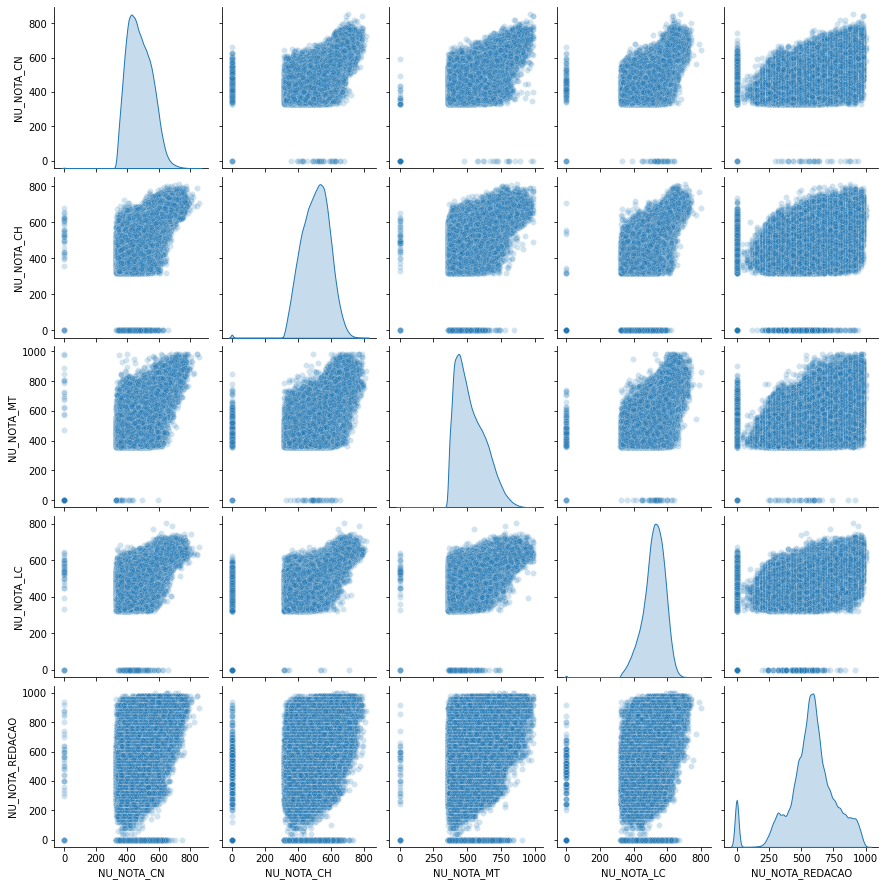

In [61]:
#Utilizando a função pairplot do Seaborn é possível analizar a distribuição das notas (Diagonal) e Correlação entre elas.

import seaborn as sns

sns.pairplot(base[provas],diag_kind = 'kde', plot_kws = {'alpha': 0.2} )